# Graph Theory
## In this lesson
* What is a graph?
* NetworkX
* Visualising Graphs

# What is a graph?

A graph is a collection of nodes connected by edges. Both nodes and edges may have properties.

<img align="left" width="70%" src="../images/simple_graph.PNG">


# Extra: What is a chart?

What you thought a graph was!

<img align="left" width="50%" src="../images/example_chart.PNG">

# NetworkX

[NetworkX](https://networkx.org/) is a Python package to help working with graphs.

To install NetworkX, you can use pip

`pip install networkx`

First let's create a graph and add a couple of nodes.

In [2]:

# Import NetworkX
import networkx as nx

# Create a graph
G = nx.Graph()

# Add two nodes
G.add_node(1)
G.add_node(2)


N.B. Using a capital `G` for our graph object is not standard [PEP-8](https://www.python.org/dev/peps/pep-0008/), however it is convention for NetworkX.

Now we have our graph, we want to be able to visualise it, fortunately NetworkX integrates with [MatplotLib](https://matplotlib.org/) to make this easy.

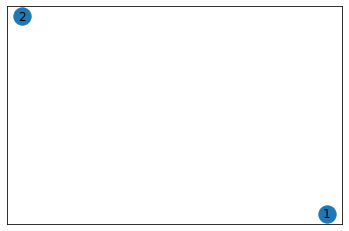

In [6]:

# Import MatplotLib
import matplotlib.pyplot as plt

# NetworkX draw graph function
nx.draw_networkx(G)

# Show
plt.show()


Above you can now see our graph, including the labels for the nodes, 1 and 2. Nodes don't have to be integers though and can actually be any Python data type, even instances of custom classes.

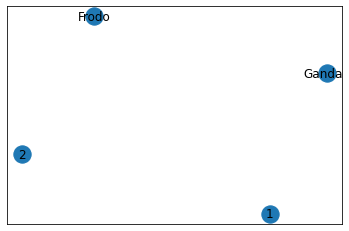

In [9]:

# Add nodes
G.add_node("Frodo")
G.add_node("Gandalf")

# Plot
nx.draw_networkx(G)
plt.show()


Just as we can add nodes, we can also add edges, say we wanted to connect Frodo and Gandalf.

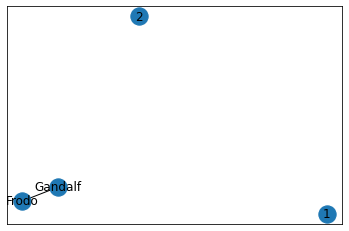

In [10]:

# Add edge
G.add_edge("Frodo", "Gandalf")

# Plot
nx.draw_networkx(G)
plt.show()


Edges can have properties containing additional information. This is completely flexible, edges can have any property you like.

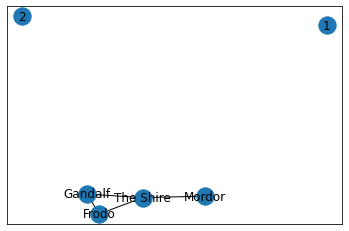

In [12]:

# The Shire
G.add_node("The Shire")
G.add_edge("Frodo", "The Shire", type="Is From")
G.add_edge("Gandalf", "The Shire", type="Visits")

# Mordor
G.add_node("Mordor")
G.add_edge("The Shire", "Mordor", type="Distance", distance=5000)

# Plot
nx.draw_networkx(G)
plt.show()


N.B. We can also provide various named parameters to `nx.draw_network` to change how our graph is displayed, as documented [here](https://networkx.org/documentation/stable//reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx). e.g.

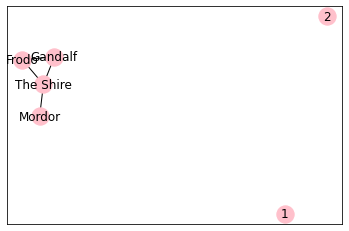

In [13]:
nx.draw_networkx(G, node_color="pink")
plt.show()

## Exercise

Install NetworkX to create and visualise your own graph.

# Graph Algorithms

An advantage of using NetworkX is the access to a [wide array of graph algorithms](https://networkx.org/documentation/stable//reference/algorithms/index.html) which it gives us. Obviously, there is a lot of theory behind these and way to many to cover in one session. Instead I'll demonstrate some of my favourites.


## Centrality

Centrality is what it says on the tin, for a given graph how central is a given node. This is typically used for identifying influential nodes in a graph, for example in a social network use case.


### Degree Centrality

The simplest measure of centrality is degree centrality. We define the degree of a node as the number of edges connected to it. so in our earlier example, `The Shire` has the greatest degree, of 3. NetworkX lets us calculate the degree of any node.

In [24]:
print(G.degree("Frodo"))

2


In [25]:
print(G.degree("The Shire"))

3


Degree centrality is defined for each node as the degree divided by the maximum possible degree (number of nodes -1). NetworkX lets us calculate the degree centrality for all nodes as a dictionary.

In [26]:
nx.degree_centrality(G)

{1: 0.0,
 2: 0.0,
 'Frodo': 0.4,
 'Gandalf': 0.4,
 'The Shire': 0.6000000000000001,
 'Mordor': 0.2}

Degree centrality is effective for our small example graph, but may not be the most appropriate for larger graphs.

To demonstrate this, lets use a new graph. NetworkX contains a number of pre-built graph generation algorithms. Let's use a random [Erdős-Rényi graph](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model).


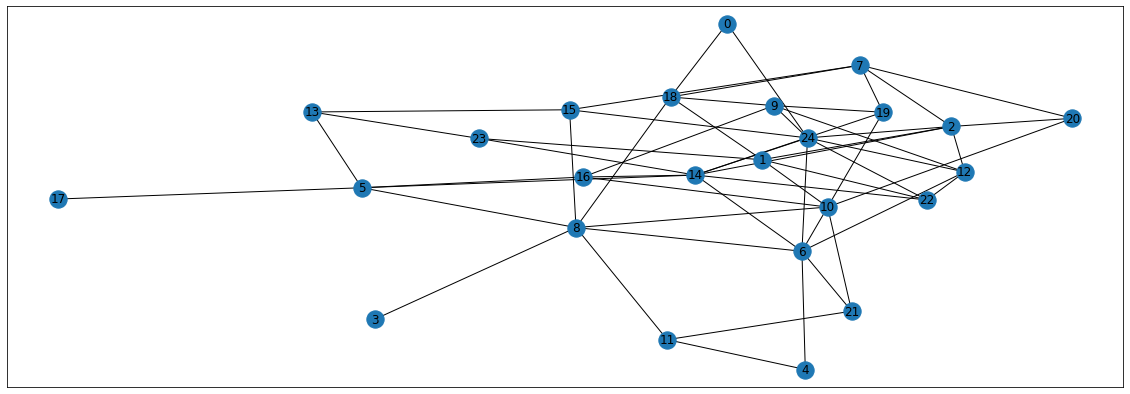

In [41]:
# Generate a new graph
H = nx.erdos_renyi_graph(25, 0.15)

# Make the axis a little bigger to show this more complex graph
fig, ax = plt.subplots(figsize=(20, 7))

# Plot
nx.draw_networkx(H)
plt.show()

Once again, let's calculate the degree centrality

In [42]:
nx.degree_centrality(H)

{0: 0.08333333333333333,
 1: 0.20833333333333331,
 2: 0.25,
 3: 0.041666666666666664,
 4: 0.08333333333333333,
 5: 0.20833333333333331,
 6: 0.29166666666666663,
 7: 0.20833333333333331,
 8: 0.29166666666666663,
 9: 0.20833333333333331,
 10: 0.29166666666666663,
 11: 0.125,
 12: 0.20833333333333331,
 13: 0.125,
 14: 0.3333333333333333,
 15: 0.16666666666666666,
 16: 0.16666666666666666,
 17: 0.041666666666666664,
 18: 0.20833333333333331,
 19: 0.16666666666666666,
 20: 0.125,
 21: 0.125,
 22: 0.16666666666666666,
 23: 0.125,
 24: 0.3333333333333333}

#### Exercise

Write a script to determine the node with the maximum centrality from this dictionary.

#### Solution

In [43]:

# I Googled it!
# https://stackoverflow.com/questions/3282823/get-the-key-corresponding-to-the-minimum-value-within-a-dictionary

centrality_dict = nx.degree_centrality(H)

max_centrality_node = max(centrality_dict, key=centrality_dict.get)

print(max_centrality_node)


14


This isn't quite the full story though, as you will see, looking at the dictionary, it's very possible that several nodes all have this same maximum centrality. To find a better most central node, we should try some alternate centrality measures.

### Betweenness Centrality

Betweenness centrality is defined by how many shortest paths between other nodes, each node lies on.

Much like degree centrality, NetworkX returns betweenness centrality as a dictionary, so we can work out the most central node using the same method as above.


In [44]:

centrality_dict = nx.betweenness_centrality(H)

max_centrality_node = max(centrality_dict, key=centrality_dict.get)

print(max_centrality_node)


8


### Katz Centrality

Katz centrality is a more complicated measure of centrality which considers not just the connections a node has, but how well connected its connections are too. For more information, check [the documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality.html).

In [45]:

centrality_dict = nx.katz_centrality(H)

max_centrality_node = max(centrality_dict, key=centrality_dict.get)

print(max_centrality_node)


24


## Communities

Think of community detection as a type of clustering on graphs, for a given graph can we generate some distinct groups of nodes?

In order to demonstrate this, I am going to use a simple barbell graph.

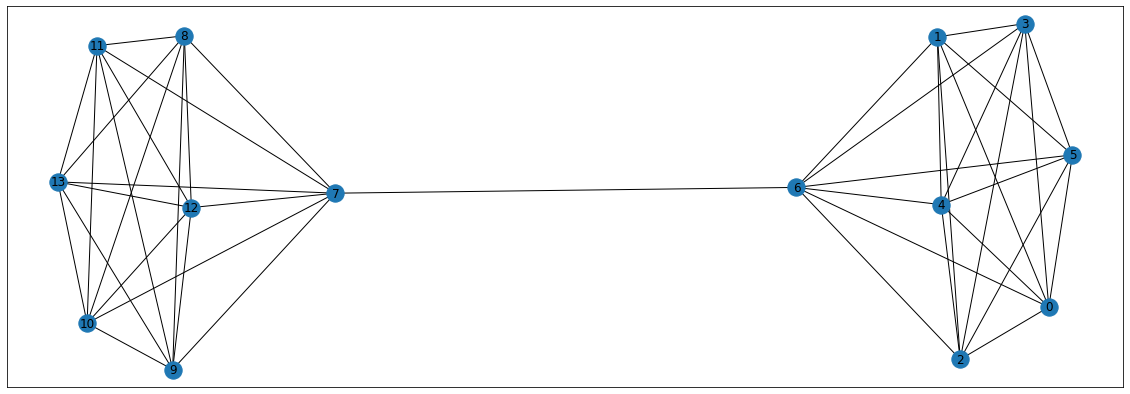

In [55]:
# Barbell graph
I = nx.barbell_graph(7, 0)

# Make the axis a little bigger to show this more complex graph
fig, ax = plt.subplots(figsize=(20, 7))

# Plot
nx.draw_networkx(I)
plt.show()

I'm going to use the [Girvan–Newman algorithm](https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm), (which uses changes in centrality to break graphs into communities), but [others are available](https://networkx.org/documentation/stable//reference/algorithms/community.html).

In [56]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(I)
top_level_communities = next(communities_generator)

print(top_level_communities)

({0, 1, 2, 3, 4, 5, 6}, {7, 8, 9, 10, 11, 12, 13})


Seeing the nodes in each community, as expected, each end of my barbell is its own community.

### Path Finding

One of the more obvious use cases for graphs is finding efficient paths between locations.

Let's use a real-world example for this one. We can take the excel file available from [this freedom of information request](https://www.whatdotheyknow.com/request/distance_between_adjacent_underg) and use it to build a graph of the London Underground.

First read in using Pandas.

In [63]:

# Pandas to read the data
import pandas as pd
# Display function to view data
from IPython.display import display

# Read excel
df = pd.read_excel("../data/Inter station database.xls", sheet_name="Runtime", skiprows=1)

# Display
display(df)


,Line,Direction,Station from (A),Station to (B),Distance (Kms),Un-impeded Running Time (Mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins)
0,Bakerloo,Southbound,HARROW & WEALDSTONE,KENTON,1.74,2.233333,2.500000,2.500000
1,Bakerloo,Southbound,KENTON,SOUTH KENTON,1.40,1.883333,2.000000,2.000000
2,Bakerloo,Southbound,SOUTH KENTON,NORTH WEMBLEY,0.90,1.500000,1.500000,1.500000
3,Bakerloo,Southbound,NORTH WEMBLEY,WEMBLEY CENTRAL,1.27,1.916667,2.058824,2.058824
4,Bakerloo,Southbound,WEMBLEY CENTRAL,STONEBRIDGE PARK,1.71,2.233333,3.125000,3.125000
...,...,...,...,...,...,...,...,...
738,East London,Southbound,WAPPING,ROTHERHITHE,0.51,1.166667,1.500000,1.500000
739,East London,Southbound,ROTHERHITHE,CANADA WATER,0.32,0.933333,1.000000,1.000000
740,East London,Southbound,CANADA WATER,SURREY QUAYS,0.55,1.700000,2.000000,2.089286
741,East London,Southbound,SURREY QUAYS,NEW CROSS,2.27,4.266667,4.500000,4.500000



#### Exercise

Use the data in this dataframe to build a graph of the London Underground with distance and/or running time as a property of edges.

N.B. You may want to use a directed graph, where edges can only be traversed in one direction.

`nx.DiGraph()`


In [ ]:

# Define a graph
DG = nx.DiGraph()

# Add stations





#### Solution

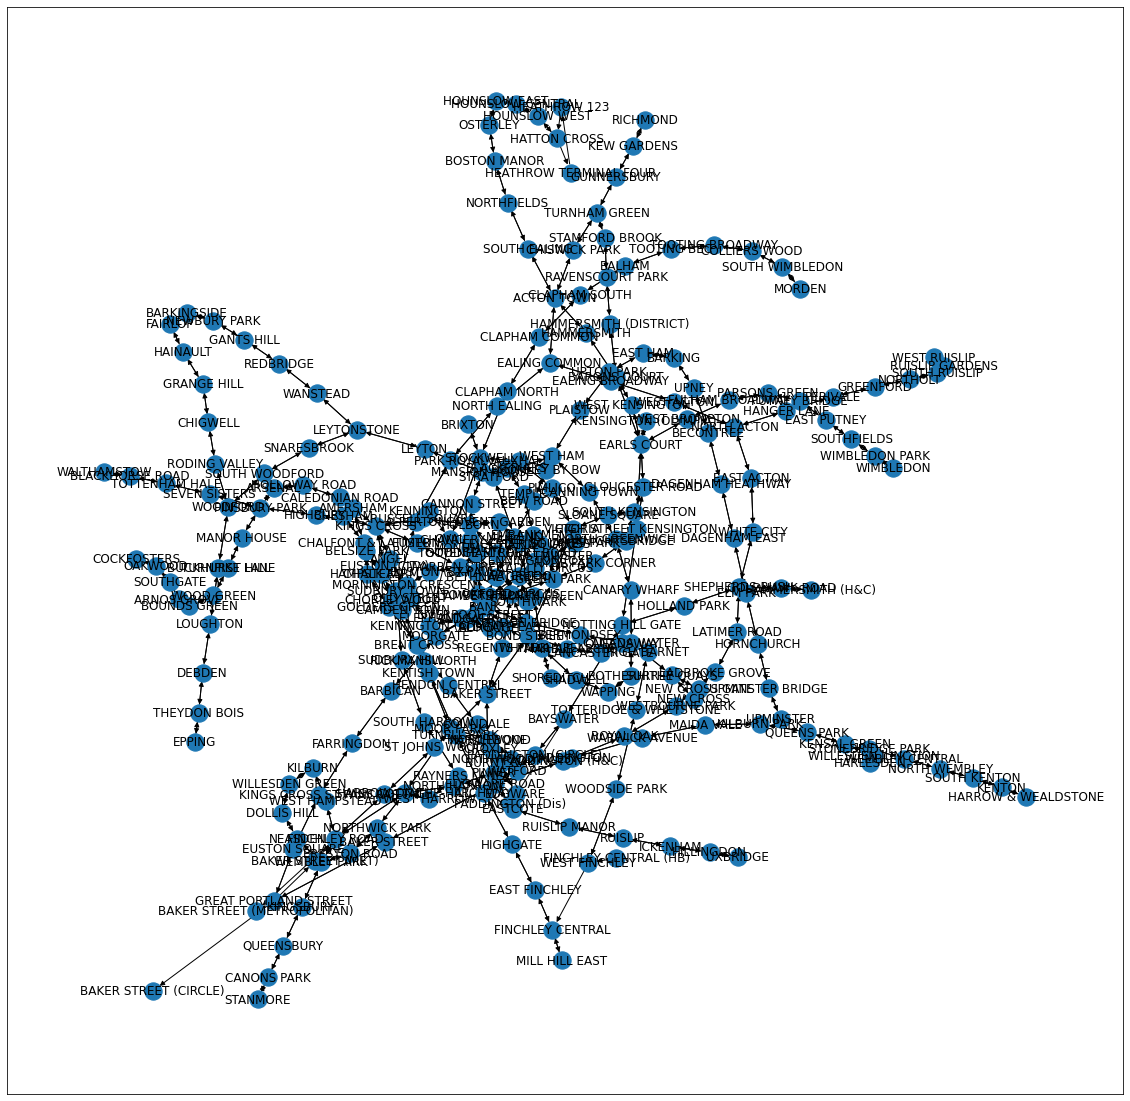

In [69]:

# Define a graph
DG = nx.DiGraph()

# Add stations
for station in set(df["Station from (A)"]) & set(df["Station to (B)"]):
    DG.add_node(station)
    
# Add edges
# Function
def add_edge(row):
    DG.add_edge(row["Station from (A)"], row["Station to (B)"],
                distance = row["Distance (Kms)"],
                time = row["Un-impeded Running Time (Mins)"])

# Apply function
df.apply(add_edge, axis=1)
    
# Make the axis a little bigger to show this more complex graph
fig, ax = plt.subplots(figsize=(20, 20))

# Plot
nx.draw_networkx(DG)
plt.show()
    

Now we have our graph, we can ask questions of it, in this case, what is the shortest path between any two stations. NetworkX uses [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) to find optimum paths.

Note that we can ask the question in terms of time, or distance and get a different answer!

In [71]:
print(nx.shortest_path(DG, source="BAKER STREET", target="MANSION HOUSE", weight="distance"))

['BAKER STREET', 'REGENTS PARK', 'OXFORD CIRCUS', 'TOTTENHAM COURT ROAD', 'LEICESTER SQUARE', 'CHARING CROSS', 'EMBANKMENT', 'TEMPLE', 'BLACKFRIARS', 'MANSION HOUSE']


In [72]:
print(nx.shortest_path(DG, source="BAKER STREET", target="MANSION HOUSE", weight="time"))

['BAKER STREET', 'BOND STREET', 'GREEN PARK', 'WESTMINSTER', 'EMBANKMENT', 'TEMPLE', 'BLACKFRIARS', 'MANSION HOUSE']


Taking the Bakerloo line via Regents Park may be a shorter distance, but it is actually quicker to catch the Jubilee line and travel via Bond Street.

## Graph Layouts

A useful trick to be aware of when plotting graphs with NetworkX is that you can override the default node positioning. I personally quite like the Kamada-Kawai layout which uses a weighting to distribute points. For example, using distance and our London Underground graph works very well to produce a more geographically representative visualisation:

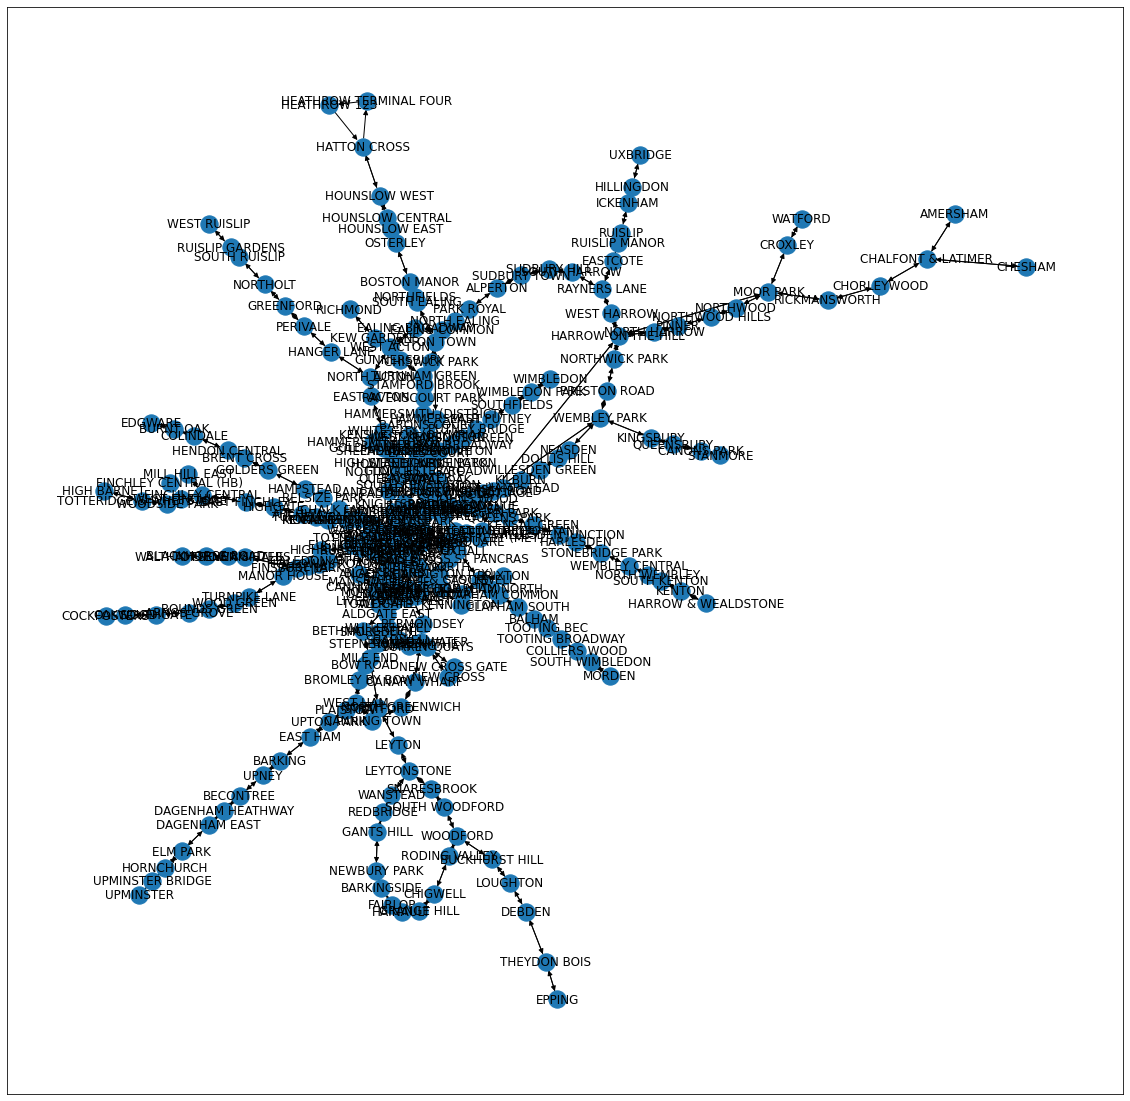

In [74]:
pos = nx.layout.kamada_kawai_layout(DG, weight = "distance")

# Make the axis a little bigger to show this more complex graph
fig, ax = plt.subplots(figsize=(20, 20))

# Plot
nx.draw_networkx(DG, pos=pos)
plt.show()

Those familiar with the London Underground will see distant stations like Amersham and Chesham are appropriately separated from other nodes at the end of chains.

Of course, the Kamada-Kawai layout is one of [many available](https://networkx.org/documentation/latest/reference/drawing.html#module-networkx.drawing.layout) and I recommend experimenting with what works best for your use-case.

### Activity

Try visulising the London Underground Graph using some other layouts.

In [ ]:

# Make the axis a little bigger to show this more complex graph
fig, ax = plt.subplots(figsize=(20, 20))

# Plot
nx.draw_networkx(DG, pos=pos)
plt.show()


It's also worth noting that the `pos` variable produced by layout functions is simply a dictionary which provides coordinates for each node.

In [78]:
print(pos["TUFNELL PARK"])
print(pos["NORTHWOOD HILLS"])
print(pos["TOOTING BROADWAY"])

[-0.18099572  0.00571709]
[0.4767192  0.33399266]
[ 0.22667007 -0.19405513]


One can quite easily calculate their own `pos` variable, for the London Underground it might be appropriate to use a dataset providing geographical locations for each station, or ones that match the tube map layout.

# Recap

Today we have learned, what a graph is, how to use them in Python along with a handful of algorithms we can use with them.
* Nodes
* Edges
* Degree Centrality
* Betweenness Centrality
* Katz Centrality
* Community Detection
* Pathfinding

# Homework

Do some further analytics using the London Underground dataset.

* What is the most central station?
* Are there any communities, can you visualise these?
* Can you aggregate some graph statistics by line?
